<a href="https://colab.research.google.com/github/HebaAhmedDahab/Projects-/blob/main/Bike_Buyers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

importing the libraries 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#from google.colab import files
#from google.colab import auth
#auth.authenticate_user() 
#import gspread 
#from google.auth import default 
#creds, _ = default() 
#from gspread_dataframe import set_with_dataframe

In [ ]:
#reading the csv file
bike_buyers = pd.read_csv("/content/bike_buyers.csv")
bike_buyers.head()

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000.0,1.0,Bachelors,Skilled Manual,Yes,0.0,0-1 Miles,Europe,42.0,No
1,24107,Married,Male,30000.0,3.0,Partial College,Clerical,Yes,1.0,0-1 Miles,Europe,43.0,No
2,14177,Married,Male,80000.0,5.0,Partial College,Professional,No,2.0,2-5 Miles,Europe,60.0,No
3,24381,Single,NaN,70000.0,0.0,Bachelors,Professional,Yes,1.0,5-10 Miles,Pacific,41.0,Yes
4,25597,Single,Male,30000.0,0.0,Bachelors,Clerical,No,0.0,0-1 Miles,Europe,36.0,Yes


cleaing and processing

In [ ]:
bike_buyers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                1000 non-null   int64  
 1   Marital Status    993 non-null    object 
 2   Gender            989 non-null    object 
 3   Income            994 non-null    float64
 4   Children          992 non-null    float64
 5   Education         1000 non-null   object 
 6   Occupation        1000 non-null   object 
 7   Home Owner        996 non-null    object 
 8   Cars              991 non-null    float64
 9   Commute Distance  1000 non-null   object 
 10  Region            1000 non-null   object 
 11  Age               992 non-null    float64
 12  Purchased Bike    1000 non-null   object 
dtypes: float64(4), int64(1), object(8)
memory usage: 101.7+ KB


In [ ]:
bike_buyers.isnull().sum()

ID                   0
Marital Status       7
Gender              11
Income               6
Children             8
Education            0
Occupation           0
Home Owner           4
Cars                 9
Commute Distance     0
Region               0
Age                  8
Purchased Bike       0
dtype: int64

In [ ]:
#Dropping The NaN Values 
bike_buyers = bike_buyers.dropna()
bike_buyers.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Purchased Bike      0
dtype: int64

In [ ]:
#Check The Duplicate Values
bike_buyers.duplicated().sum()

0

In [ ]:
bike_buyers['Region'].value_counts()

North America    486
Europe           286
Pacific          180
Name: Region, dtype: int64

In [ ]:
#Change The Type (int) To Remove The Decimals
bike_buyers['Income'] = bike_buyers['Income'].astype(int)
bike_buyers['Children'] = bike_buyers['Children'].astype(int)
bike_buyers['Cars'] = bike_buyers['Cars'].astype(int)
bike_buyers['Age'] = bike_buyers['Age'].astype(int)
bike_buyers.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
0,12496,Married,Female,40000,1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,No
1,24107,Married,Male,30000,3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,No
2,14177,Married,Male,80000,5,Partial College,Professional,No,2,2-5 Miles,Europe,60,No
4,25597,Single,Male,30000,0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Yes
5,13507,Married,Female,10000,2,Partial College,Manual,Yes,0,1-2 Miles,Europe,50,No


In [ ]:
#detectin and deleting the outliers 
lower_limit = bike_buyers['Age'].quantile(0.05)   #  28
upper_limit = bike_buyers['Age'].quantile(0.95)   #  65  
bike_buyers_df = bike_buyers[(bike_buyers['Age'] >= lower_limit) & (bike_buyers['Age'] <= upper_limit)]

#Exploring

i`m gonna explore the data as whole then i will split it based on the Region column (Europe, Pacific and North America)

In [ ]:
bike_buyers_df['Purchased Bike'].value_counts()

No     436
Yes    425
Name: Purchased Bike, dtype: int64

In [ ]:
bike_buyers['Income'].describe()

count       952.000000
mean      55903.361345
std       30845.483596
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

In [ ]:
bike_buyers_df['Income'].describe()

count       861.000000
mean      57259.001161
std       30718.739882
min       10000.000000
25%       30000.000000
50%       60000.000000
75%       70000.000000
max      170000.000000
Name: Income, dtype: float64

([<matplotlib.patches.Wedge at 0x7f266122a550>,
 [Text(-0.022073685258235946, 1.0997785015261576, 'NO'),
  Text(0.022073788226930492, -1.099778499459465, 'YES')],
 [Text(-0.012040191959037787, 0.5998791826506313, '50.6 %'),
  Text(0.012040248123780267, -0.5998791815233445, '49.4 %')])

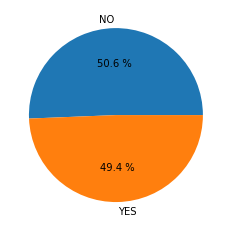

In [ ]:
# the perec. of purchased the bike between yes and no
slice = bike_buyers_df['Purchased Bike'].value_counts()
label = 'NO', 'YES'
plt.pie(slice, labels=label, autopct='%.1f %%')

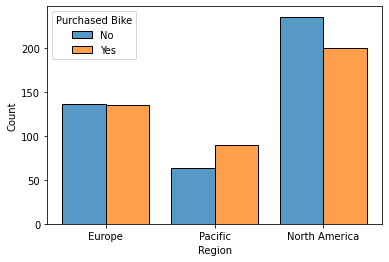

In [ ]:
sns.histplot(x="Region", data=bike_buyers_df, hue="Purchased Bike", multiple="dodge", shrink=0.8)

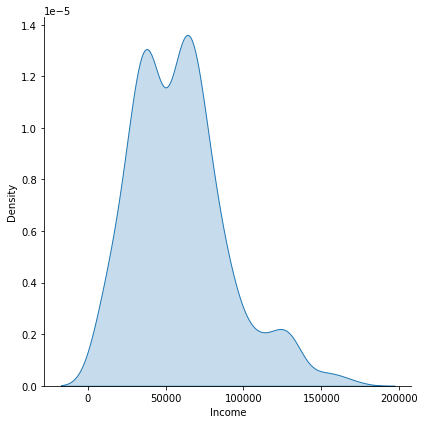

In [ ]:
#pulling from the data who purchased the bikes (yes)
yes = bike_buyers_df[bike_buyers_df['Purchased Bike'] == 'Yes']
sns.displot(data= yes, x= 'Income', kind='kde', fill=True, height=6)

# the mean Income for who purchased is = 58870,54
# the range of thier Income  = 40k :70k

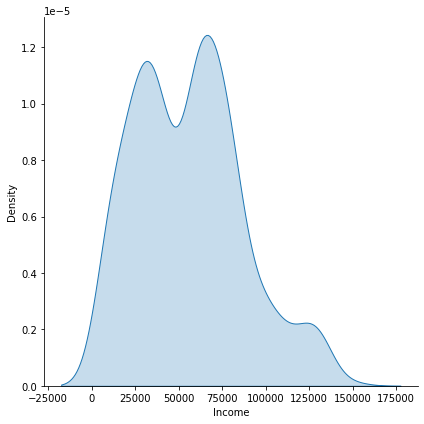

In [ ]:
#pulling from the data who purchased the bikes (no)
no = bike_buyers_df[bike_buyers_df['Purchased Bike'] == 'No']
sns.displot(data= no, x= 'Income', kind='kde', fill=True, height=6)

# the mean Income for who purchased is = 55688
# the range of thier Income  = 30k : 72,500

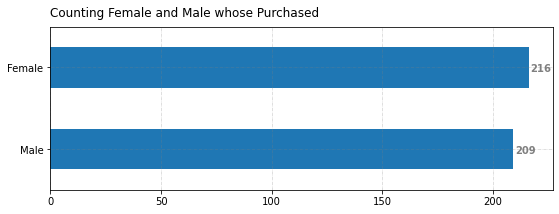

In [ ]:
#Purchases according to Gender (yes)

counting = yes['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(9,3))
counting.plot(kind='barh')
for i in ax.patches:
    ax.text(i.get_width()+0.8, i.get_y()+0.3, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
ax.invert_yaxis()
ax.set_title('Counting Female and Male whose Purchased',
             loc='left', pad=10)
plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)

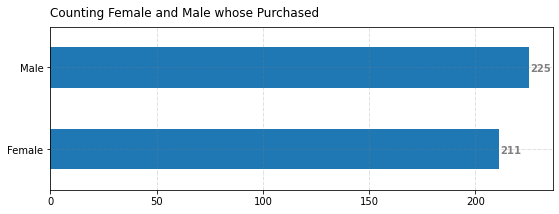

In [ ]:
#Purchases according to Gender (no)

counting_ = no['Gender'].value_counts()
fig, ax = plt.subplots(figsize=(9,3))
counting_.plot(kind='barh')
for i in ax.patches:
    ax.text(i.get_width()+0.8, i.get_y()+0.3, str(round((i.get_width()), 2)),
            fontsize=10, fontweight='bold', color='grey')
ax.invert_yaxis()
ax.set_title('Counting Female and Male whose Purchased',
             loc='left', pad=10)
plt.grid(b=True, color='grey', linestyle='-.', linewidth=0.5, alpha=0.5)

#After exploring the data as whole 
i`m gonna explore each region spread

1- Europe

In [ ]:

europe = bike_buyers[bike_buyers['Region']=='Europe']


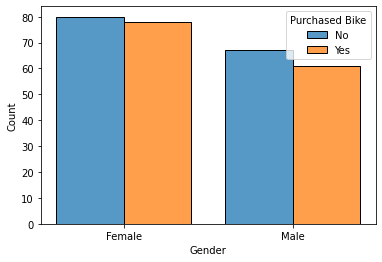

In [ ]:
#Purchases according to Gender 
sns.histplot(x="Gender", hue="Purchased Bike",data=europe ,multiple="dodge",shrink=0.8, 
             bins=['male','female'])

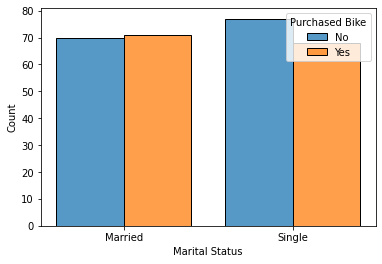

In [ ]:
#Purchases according to thier marital status
sns.histplot(x="Marital Status", data=europe, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

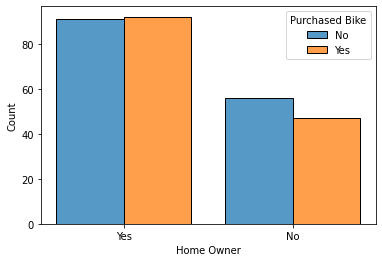

In [ ]:
#Purchases according to home owner
sns.histplot(x="Home Owner", data=europe, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

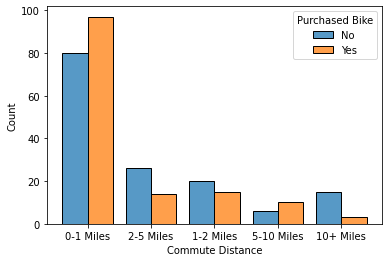

In [ ]:
#Purchases according to commute distance
sns.histplot(x="Commute Distance", data=europe, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

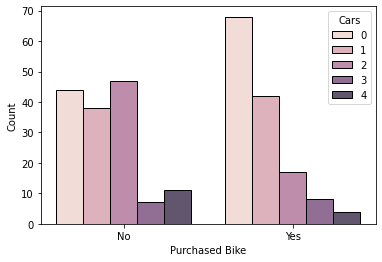

In [ ]:
#Purchases according to car owner
sns.histplot(x="Purchased Bike", data=europe, hue="Cars",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

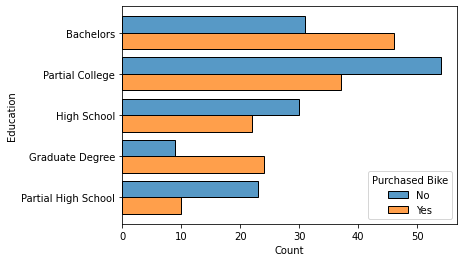

In [ ]:
#Purchases according to education
sns.histplot(y="Education", data=europe, hue="Purchased Bike",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

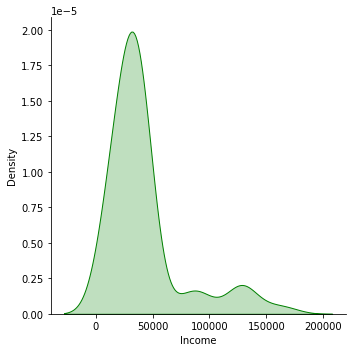

In [ ]:
# Showing Bike Purchased People's Income (yes)
europe_yes = europe[europe['Purchased Bike']=='Yes']
yes = europe_yes['Income']
sns.displot(data=europe_yes, x= yes, kind='kde', fill=True, height=5, color='g')

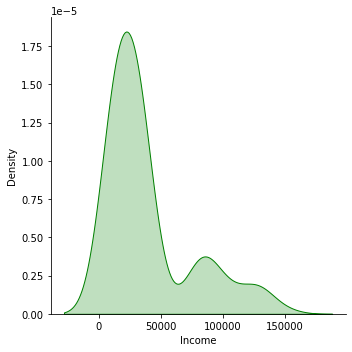

In [ ]:
# Showing Bike Purchased People's Income (no)
europe_no = europe[europe['Purchased Bike']=='No']
no = europe_no['Income']
sns.displot(data=europe_no, x= no, kind='kde', fill=True, height=5, color='g')

([<matplotlib.patches.Wedge at 0x7f265e320810>,
 [Text(-0.05270898211804452, 1.1988418424479852, 'Yes'),
  Text(0.048316464051506317, -1.0989383601010385, 'No')],
 [Text(-0.030746906235525968, 0.6993244080946579, '51.4%'),
  Text(0.02635443493718526, -0.5994209236914755, '48.6%')])

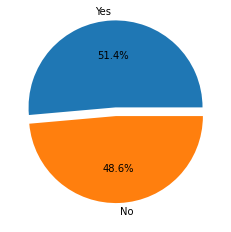

In [ ]:
#the perc. of purchased
p = europe['Purchased Bike'].value_counts()
labels = ('Yes', 'No')
explode=(0.1, 0)
plt.pie(p, explode=explode, labels=labels, autopct='%1.1f%%')

#The Pacific

In [ ]:
pacific = bike_buyers[bike_buyers['Region']=='Pacific']

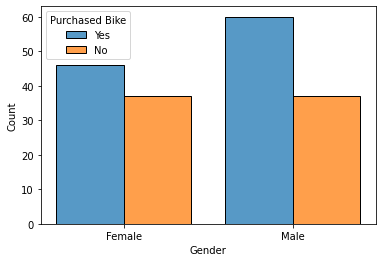

In [ ]:
#Purchases according to Gender 
sns.histplot(x="Gender", hue="Purchased Bike",data=pacific ,multiple="dodge",shrink=0.8, 
             bins=['male','female'])

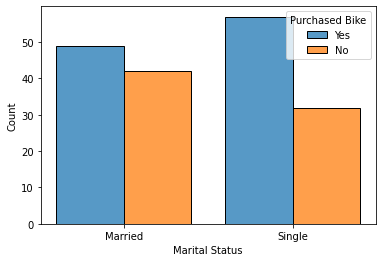

In [ ]:
#Purchases according to thier marital status
sns.histplot(x="Marital Status", data=pacific, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

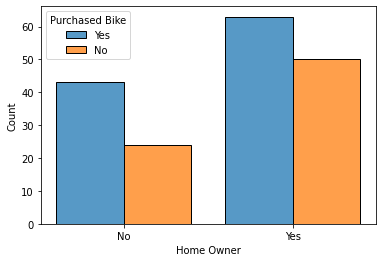

In [ ]:
#Purchases according to home owner
sns.histplot(x="Home Owner", data=pacific, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

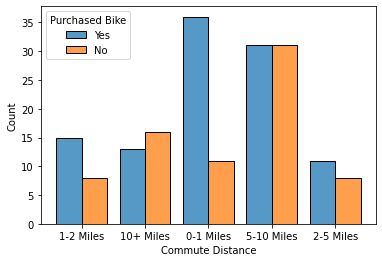

In [ ]:
#Purchases according to commute distance
sns.histplot(x="Commute Distance", data=pacific, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

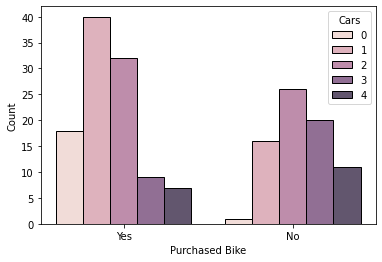

In [ ]:
#Purchases according to car owner
sns.histplot(x="Purchased Bike", data=pacific, hue="Cars",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

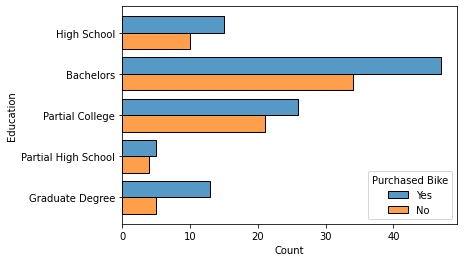

In [ ]:
#Purchases according to education
sns.histplot(y="Education", data=pacific, hue="Purchased Bike",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

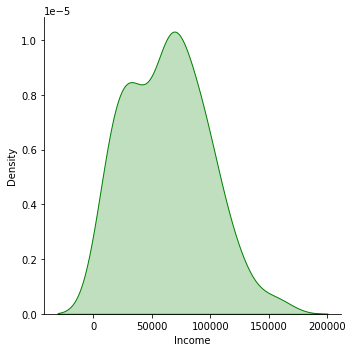

In [ ]:
# Showing Bike Purchased People's Income (yes)
pacific_yes = pacific[pacific['Purchased Bike']=='Yes']
yes = pacific_yes['Income']
sns.displot(data=pacific_yes, x= yes, kind='kde', fill=True, height=5, color='g')

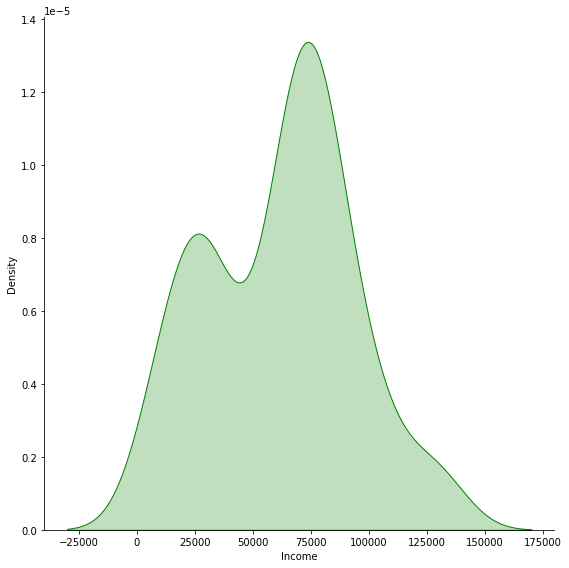

In [ ]:
# Showing Bike Purchased People's Income (no)
pacific_no = pacific[pacific['Purchased Bike']=='No']
no = pacific_no['Income']
sns.displot(data=pacific_no, x= no, kind='kde', fill=True, height=8, color='g')

([<matplotlib.patches.Wedge at 0x7f265dae9bd0>,
 [Text(-0.3307648077804384, 1.1535140406314826, 'Yes'),
  Text(0.30320107379873457, -1.0573878705788593, 'No')],
 [Text(-0.19294613787192239, 0.6728831903683649, '58.9%'),
  Text(0.16538240389021885, -0.5767570203157414, '41.1%')])

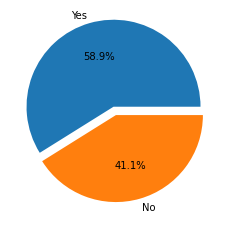

In [ ]:
#the perc. of purchased
p = pacific['Purchased Bike'].value_counts()
labels = ('Yes', 'No')
explode=(0.1, 0)
plt.pie(p, explode=explode, labels=labels, autopct='%1.1f%%')

#North America

In [ ]:
north_america = bike_buyers[bike_buyers['Region']=='North America']

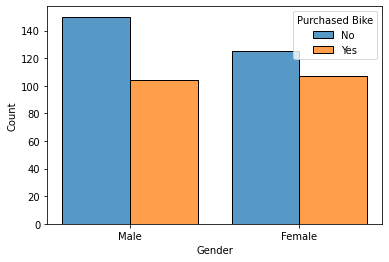

In [ ]:
#Purchases according to Gender 
sns.histplot(x="Gender", hue="Purchased Bike",data=north_america ,multiple="dodge",shrink=0.8, 
             bins=['male','female'])

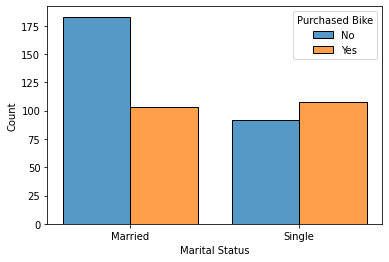

In [ ]:
#Purchases according to thier marital status
sns.histplot(x="Marital Status", data=north_america, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

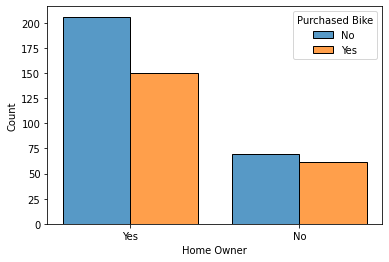

In [ ]:
#Purchases according to home owner
sns.histplot(x="Home Owner", data=north_america, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

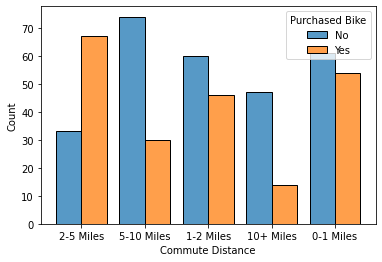

In [ ]:
#Purchases according to commute distance
sns.histplot(x="Commute Distance", data=north_america, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

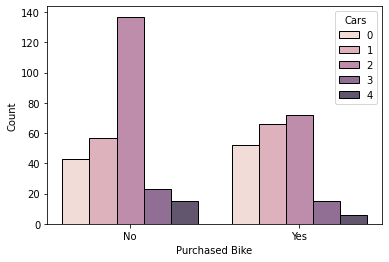

In [ ]:
#Purchases according to car owner
sns.histplot(x="Purchased Bike", data=north_america, hue="Cars",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

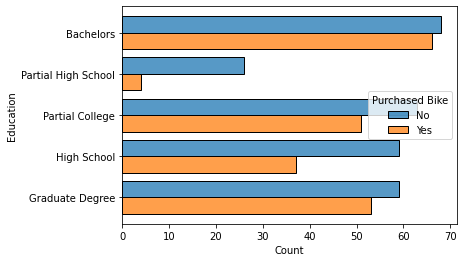

In [ ]:
#Purchases according to education
sns.histplot(y="Education", data=north_america, hue="Purchased Bike",  multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

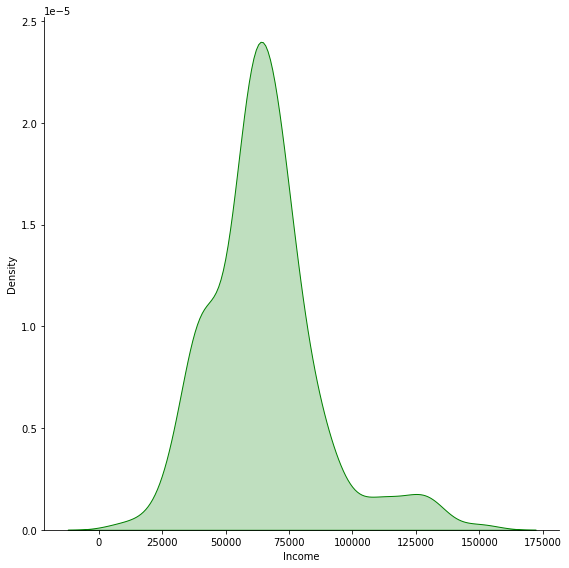

In [ ]:
# Showing Bike Purchased People's Income (yes)
north_america_yes = north_america[north_america['Purchased Bike']=='Yes']
yes = north_america_yes['Income']
sns.displot(data=north_america_yes, x= yes, kind='kde', fill=True, height=8, color='g')

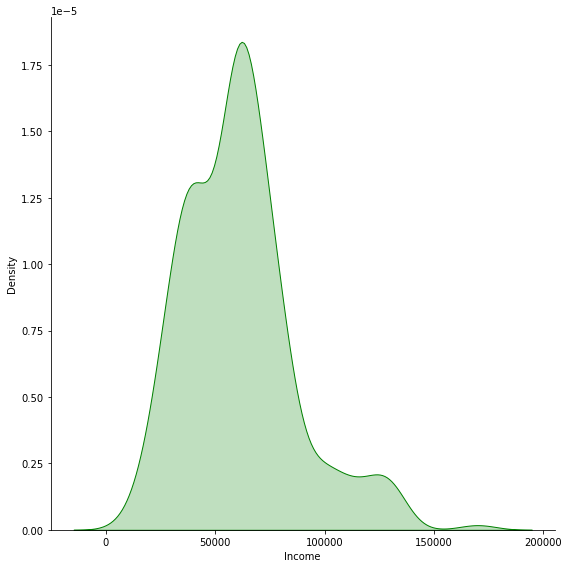

In [ ]:
# Showing Bike Purchased People's Income (no)
north_america_no = north_america[north_america['Purchased Bike']=='No']
no = north_america_no['Income']
sns.displot(data=north_america_no, x= no, kind='kde', fill=True, height=8, color='g')

([<matplotlib.patches.Wedge at 0x7f265d6e5d50>,
 [Text(-0.24645826968710097, 1.1744182906029863, 'Yes'),
  Text(0.22592018134040223, -1.076550078567235, 'No')],
 [Text(-0.14376732398414221, 0.6850773361850753, '56.6%'),
  Text(0.12322918982203757, -0.5872091337639463, '43.4%')])

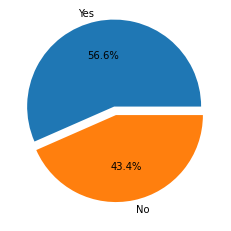

In [ ]:
#the perc. of who purchased
p = north_america['Purchased Bike'].value_counts()
labels = ('Yes', 'No')
explode=(0.1, 0)
plt.pie(p, explode=explode, labels=labels, autopct='%1.1f%%')

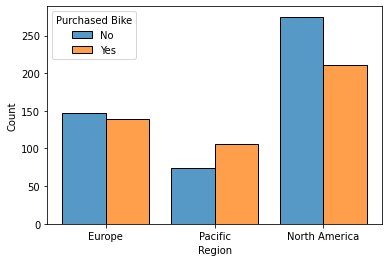

In [ ]:
#comparing between the 3 region
sns.histplot(x="Region", data=bike_buyers, hue="Purchased Bike", multiple="dodge", shrink=0.8, 
             bins=[20, 30, 40, 50, 60, 70, 80, 90])

In [ ]:
gc = gspread.authorize(creds)
sh = gc.create('Bike buyers ') 
worksheet = gc.open('Bike buyers ').sheet1
set_with_dataframe(worksheet, bike_buyers_df)